# Worksheet 3 - Scientific Visualization MVE080/MMG640
## Uncertainty and geospatial data

Name: _Your Name_

This is the third worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [55]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
import scipy.stats as st
# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15, 16 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 5 we visualized uncertainty for point estimates using i) graded error-bars and ii) fuzziness (slide 6). Briefly describe when each kind of visual is suitable.

### Answer 1.1
_Your answer here_

### Question 1.2

Another way to visualize uncertainty is a **Hypothetical outcome plots** (Chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/)). Briefly describe the key features of such a visual.

### Answer 1.2
_Your answer here_

### Question 1.3

Often when doing regression (fitting a curve to data) we want to do use the regression model to make predictions. What is important to think about when visualizing model predictions?

### Answer 1.3
_Your answer here_

### Question 1.4

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.4
_Your answer here_

### Question 1.5

A common form of visualization for maps is the Choropleth map (e.g slide 17 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.5
_Your answer here_

## Uncertainty  

For this part reading chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Coffee is undoubtedly a popular beverage (albeit inferior to tea :). On Canvas I have uploaded a dataset with ratings for coffee beans from six different countries. 

Here we are interested in identifying which country on average has the best quality beans. Create two plots, where in i) you plot the mean ($\mu$) and standard deviation for each country (using errorbars), and ii) where you plot the mean and standard error of the mean estimate. Briefly discuss the drawbacks with error-bars. 

As a reminder. For country $j$ with coffee ratings $x^{(j)}_1, \ldots, x^{(j)}_{n_j}$ the sample mean is given by 

$$
\hat{\mu}^{(j)} = \frac{1}{n_j}\sum_{i = 1}^{n_j} x_i^{(j)},
$$

sample standard deviation by

$$
\hat{\sigma}^{(j)} = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n_j} (x_i^{(j)} - \hat{\mu}^{(j)})^2},
$$

and sample standard error for $\hat{\mu}^{(j)}$

$$
\hat{\sigma}_{\hat{\mu}^{(j)}} = \frac{\hat{\sigma}^{(j)}}{\sqrt{n}}
$$

and a confidence interval with confidence level $1 - \alpha$ is given by;

$$
\hat{\mu}^{(j)} \pm t_{n-1}(1 - \alpha / 2) \hat{\sigma}_{\hat{\mu}^{(j)}}
$$

where $t_{n-1}$ is the t-distribution with $n-1$ degree of freedom. For confidence level $1 - \alpha=0.95$ and $n = 30$ we have that $t_{29}(1 - 0.025) \approx 2.05$.

  country_of_origin  num_evals       mean       std  mean_ste
4             Kenya       25.0  84.309600  1.459733  0.291947
5          Colombia      183.0  83.106557  1.413273  0.104472
1            Brazil      132.0  82.405909  2.132902  0.185645
3            Taiwan       75.0  82.001333  1.771503  0.204556
0         Guatemala      181.0  81.846575  2.885169  0.214453
2            Mexico      236.0  80.890085  2.742413  0.178516


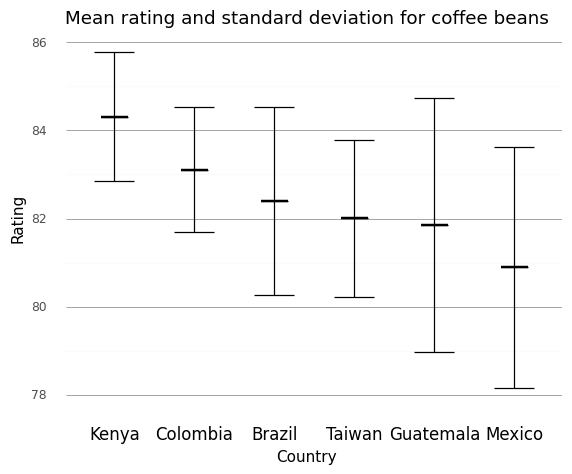

In [89]:
# Insert code here for visual 1
df_coffee = pd.read_csv('Coffee_tidy.csv')
countries = df_coffee['country_of_origin'].unique()
df_sum = pd.DataFrame(countries, columns=['country_of_origin'])

# Create dataframe with summary statistics
for c in countries:
    tmp = df_coffee.query('country_of_origin == @c')
    n_points = tmp.shape[0]
    mean = tmp['total_cup_points'].mean()
    std = tmp['total_cup_points'].std()
    df_sum.loc[df_sum['country_of_origin']==c, 'num_evals'] = n_points
    df_sum.loc[df_sum['country_of_origin']==c, 'mean'] = mean
    df_sum.loc[df_sum['country_of_origin']==c, 'std'] = std
    df_sum.loc[df_sum['country_of_origin']==c, 'mean_ste'] = std/np.sqrt(n_points)

df_sum = df_sum.sort_values('mean', ascending=False)
order = df_sum['country_of_origin'].unique()
print(df_sum)
# Plot time
p = (ggplot(df_sum, aes('country_of_origin', 'mean', ymax='mean + std', ymin='mean - std'))
    + geom_crossbar(aes(y='mean',ymin='mean', ymax='mean'), width=0.33)
    + geom_errorbar(position='identity')
    + scale_x_discrete(limits=order)
    + labs(x='Country', y='Rating', title='Mean rating and standard deviation for coffee beans')
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(),
            panel_grid_major_y=element_line(color='gray', size=0.5),
            axis_text_x = element_text(color="black", size=12))     
    )
print(p)
# Remember to print the visual 

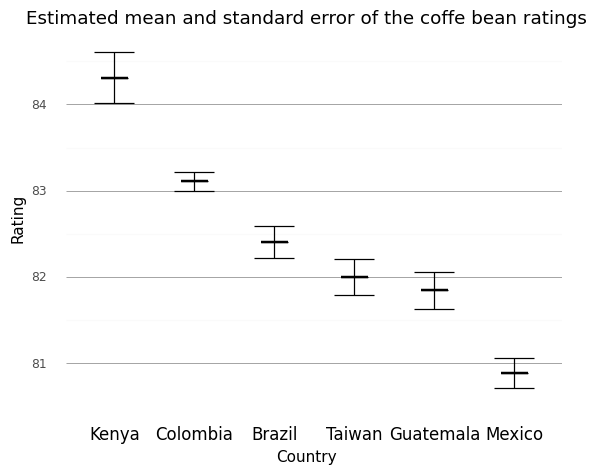

In [53]:
# Insert code here for visual 2

p = (ggplot(df_sum, aes('country_of_origin', 'mean', ymax='mean + mean_ste', ymin='mean - mean_ste'))
    + geom_crossbar(aes(y='mean',ymin='mean', ymax='mean'), width=0.33)
    + geom_errorbar(position='identity')
    + scale_x_discrete(limits=order)
    + labs(x='Country', y='Rating', title='Estimated mean and standard error of the coffe bean ratings')
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(),
            panel_grid_major_y=element_line(color='gray', size=0.5),
            axis_text_x = element_text(color="black", size=12))     
    )
print(p)
# Remember to print the visual 

When using errorbars it is impossible to:
1. Without specifying in advance the number of points used for the estimates.
2. Without specifying what the errorbars are, often through convoluted captions, it is impossible for the reader to know exactly what they represents. Especially if the reader hasn't read a lot of literature in the field.
3. Knowing how the datapoints used actually was distributed since errorbars assume that the data is Gaussian. 

### Question 2.2

Now using the coffee dataset visualize the uncertainty in the mean estimate using i) graded error-bars (here plot confidence intervals with 80%, 90% and 99% confidence) and ii) fuzzy error bars (as in slide 6 in Lecture 5).

In [94]:
# Insert code here for visual 1

# Add confidence intervals to summary dataframe
cis = [0.8, 0.9, 0.99]
labels = ['CI_80', 'CI_90', 'CI_99']
tmpo = pd.DataFrame(columns = labels, index=[0,1,2,3,4,5])
# print(tmpo)
for i, c in enumerate(countries):
    tmp = df_sum.query('country_of_origin == @c')
    print(c)
    for j, z in enumerate(cis):
        
        ci = st.t.interval(z, tmp['num_evals']-1, loc=tmp['mean'], scale=tmp['mean_ste'])
        ci = [ci[0][0], ci[1][0]]
        row = [z, ci[0], ci[1]]
#         print(row)
        tmpo.iloc[i,j] = ci
# print(tmpo)
df_sum = pd.concat([df_sum, tmpo], axis=1) # The confidence intervals somehow ended up on the correct places
print(df_sum['CI_80'])
p = (ggplot(df_sum, aes(x = "country_of_origin")) 
  + geom_errorbar(aes(ymin = df_sum['CI_80'][0], ymax = df_sum['CI_80'][1], color = "CI_percent"), width=0.15)
#   + geom_errorbar(aes(ymin = "CI_low", ymax = "CI_high", size = "CI_percent", color="CI_percent", width=0.0))
#   + scale_color_manual(values = ["#a6bddb", "#3690c0", "#045a8d"], name = "Confidence level")
#   + scale_size_manual(values = [1.5, 3.0, 4.5], name = "Confidence level")
#   + labs(x = "", y = "Rating", title = "Rating of chocolate bars from different countries")
#   + theme_minimal()
#   + theme(panel_grid_major_x=element_blank(),
#           axis_text_x = element_text(size=12))
    )

p
# Remember to print the visual 

Guatemala
Brazil
Mexico
Taiwan
Kenya
Colombia
                                    CI_80  \
4  [83.92486225908604, 84.69433774091397]   
5  [82.97218314320786, 83.24093161089051]   
1  [82.16678917306453, 82.64502900875365]   
3  [81.73682322677301, 82.26584343989366]   
0  [81.57072972540576, 82.12241944586495]   
2  [80.66066246475458, 81.11950702677086]   

                                    CI_80  \
4  [83.92486225908604, 84.69433774091397]   
5  [82.97218314320786, 83.24093161089051]   
1  [82.16678917306453, 82.64502900875365]   
3  [81.73682322677301, 82.26584343989366]   
0  [81.57072972540576, 82.12241944586495]   
2  [80.66066246475458, 81.11950702677086]   

                                    CI_80  
4  [83.92486225908604, 84.69433774091397]  
5  [82.97218314320786, 83.24093161089051]  
1  [82.16678917306453, 82.64502900875365]  
3  [81.73682322677301, 82.26584343989366]  
0  [81.57072972540576, 82.12241944586495]  
2  [80.66066246475458, 81.11950702677086]  


KeyError: 0

In [ ]:
# Insert code here for visual 2
# Remember to print the visual 

### Question 2.3

Frequency graphs are a powerful tool for visualizing probabilities. On Canvas I have uploaded an image of such a graph, please recreate it (you do not have to recreate the colors perfectly). The figure might look strange when rendered in Jupyter (then it is better to save it to disk and see how it looks like),

In [ ]:
# Insert code here 
# Remember to print the visual 

## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (you should be able to install it via the Anaconda navigator).

### Question 3.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colors (here you can represent countries without Starbucks as white) which show the number of Starbucks stores in different Asian countries. See code below for how to get the Asian map.

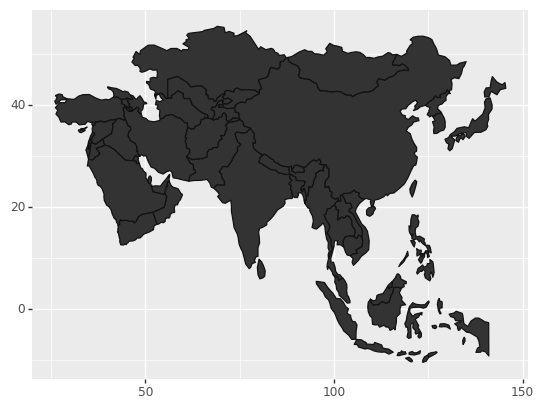

<ggplot: (8735641724483)>

In [51]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(asia)
    + geom_map())

In [ ]:
# Insert code here for visual 1
# Remember to print the visual 

In [ ]:
# Insert code here for visual 1
# Remember to print the visual 

## Question 3.2

On Canvas I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

See code below for how to get the world map (with an appropriate projection).

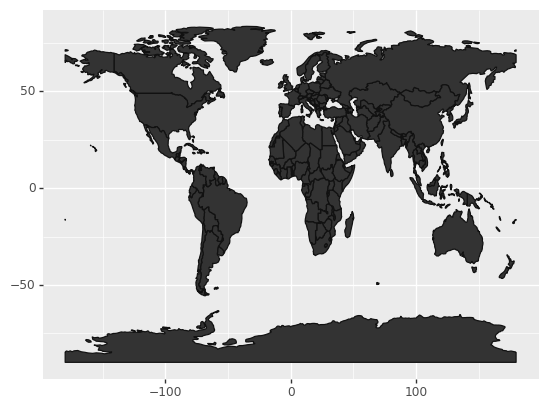

<ggplot: (8735641988295)>

In [73]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(world)
    + geom_map())

In [ ]:
# Insert code here 
# Remember to print the visual 